In [13]:
#importing all necessary packages. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

#Formating the plotting frames. 
plt.rcParams['figure.figsize'] = (10.0,7.0)
plt.rcParams['figure.constrained_layout.use']= True
plt.rc('font',size=18)

#Read_the_CSV_File_and_verify_it.
df = pd.read_csv('Week_2.csv',header = None,skiprows =1)
df.columns=['X1','X2','Y']
print(df.head())

#seperate the dataframe this is done to plot the graph using matplotlib.
df0=df[df.Y == 1]
df1=df[df.Y == -1]
print (df0.head())
print (df1.head())


     X1    X2  Y
0 -0.47  0.83 -1
1 -0.76 -0.52  1
2 -0.45 -0.61  1
3  0.80 -0.26  1
4 -0.41 -0.58  1
     X1    X2  Y
1 -0.76 -0.52  1
2 -0.45 -0.61  1
3  0.80 -0.26  1
4 -0.41 -0.58  1
5  0.98  0.93  1
      X1    X2  Y
0  -0.47  0.83 -1
8   0.28  0.62 -1
21 -0.09  0.71 -1
30 -0.35  0.64 -1
45  0.07  0.49 -1


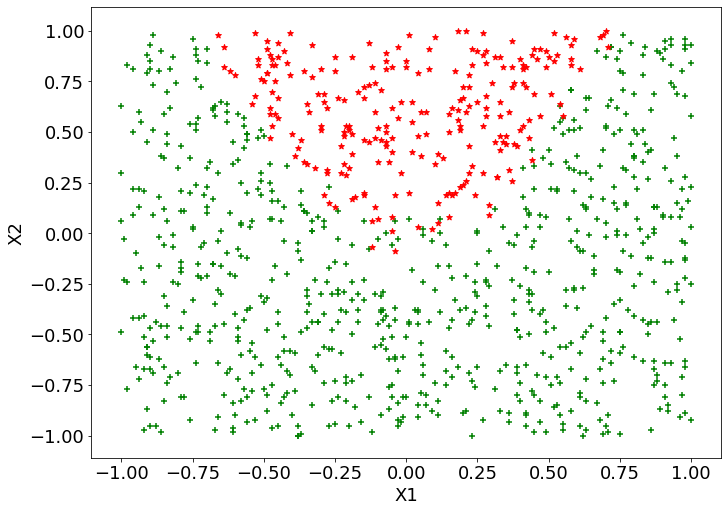

In [14]:
#plt graph using matplotlib
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(df0['X1'],df0['X2'],color='green',marker='+')
plt.scatter(df1['X1'],df1['X2'],color='red',marker='*')
plt.show()

In [15]:
#Splting data for train and test purpose.
#from sklearn.model_selection import train_test_split(one method of trainning data)
X=df.drop(['Y'],axis='columns')
y=df.Y
print(y.head())
print(X.head())

0   -1
1    1
2    1
3    1
4    1
Name: Y, dtype: int64
     X1    X2
0 -0.47  0.83
1 -0.76 -0.52
2 -0.45 -0.61
3  0.80 -0.26
4 -0.41 -0.58


In [16]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05)
#Taking the entire value of the independent to test for increasing accuracy.
X_train=X
y_train=y

In [17]:
print(len(X_train))

999


In [18]:
#import the neccessary Linera SVC package using sklearn
from sklearn.svm import LinearSVC
#C is specified/done for regularization.
model1 = LinearSVC(C=1)
model1.fit(X_train,y_train)
#printing the model parameters.
print(model1.intercept_, model1.coef_)
print(model1.score(X_train,y_train))
#Assigning values of intercept and slope to varaibles.  
#It is done to predict the output and decision boundary for each c value.
c1=model1.intercept_
a=str(model1.coef_)
m1 = float(a[3:13])
m2 = float(a[14:24])

[0.70767034] [[ 0.08779813 -1.27493468]]
0.8068068068068068


In [19]:
#C is specified/done for regularization. for C value 0.01
model2 = LinearSVC(C=0.01)
model2.fit(X_train,y_train)
#printing the model parameters.
print(model2.intercept_, model2.coef_)
print(model2.score(X_train,y_train))
c2=model2.intercept_
#Assigning values of intercept and slope to varaibles.  
#It is done to predict the output and decision boundary for each c value.c2=model2.intercept_
b=str(model2.coef_)
m3 = float(b[3:13])
m4 = float(b[14:24])


[0.52791839] [[ 0.05226747 -0.83113969]]
0.8058058058058059


In [20]:
#for C value 100
model3 = LinearSVC(C=100)
model3.fit(X_train,y_train)
#C is specified/done for regularization.
print(model3.intercept_, model3.coef_)
print(model3.score(X_train,y_train))
#Assigning values of intercept and slope to varaibles.  
#It is done to predict the output and decision boundary for each c value.c2=model2.intercept_
c3=model3.intercept_
c=str(model3.coef_)
m5 = float(c[3:13])
m6 = float(c[14:24])


[0.69184134] [[ 0.04985213 -1.29902123]]
0.8108108108108109


C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


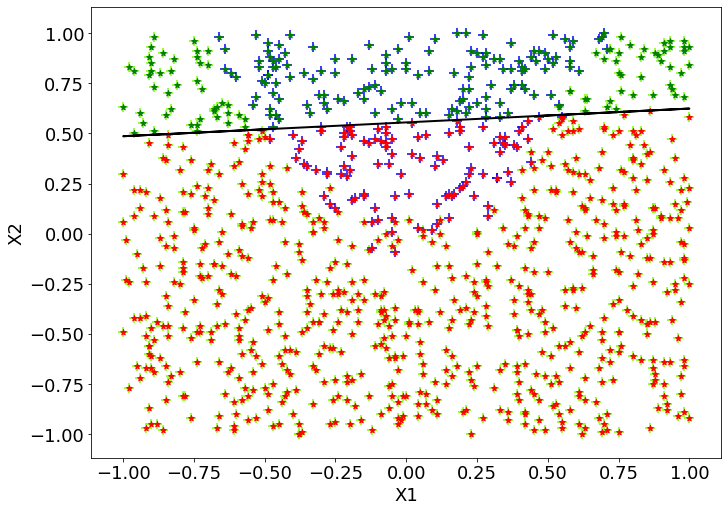

In [21]:
#for C value = 1. predicte the value of output.
#y_pred1 = np.sign(0.08780284* df.X1 + (-1.27493105 * df.X2) + 0.70767091)by this also we can predict y value.
y_pred1=model1.predict(X_train)
df['y_predicted1']=y_pred1
#calculating decision boundary for c value 1(y=0 in y=mx1+mx2+c  where m1 and m2 are solpe and c in intercept.)
decision_boundary1=((-m1*df.X1)-c1)/m2
df2=df[df.y_predicted1 == 1]
df3=df[df.y_predicted1 == -1]
#plt graph with decision boundary
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(df0['X1'],df0['X2'],color='lawngreen',marker='+',s=100)
plt.scatter(df1['X1'],df1['X2'],color='blue',marker='+',s=100)
plt.scatter(df2['X1'],df2['X2'],color='r',marker='*')
plt.scatter(df3['X1'],df3['X2'],color='g',marker='*')
plt.plot(df.X1,decision_boundary1,color ='black',linewidth=2)
plt.show()

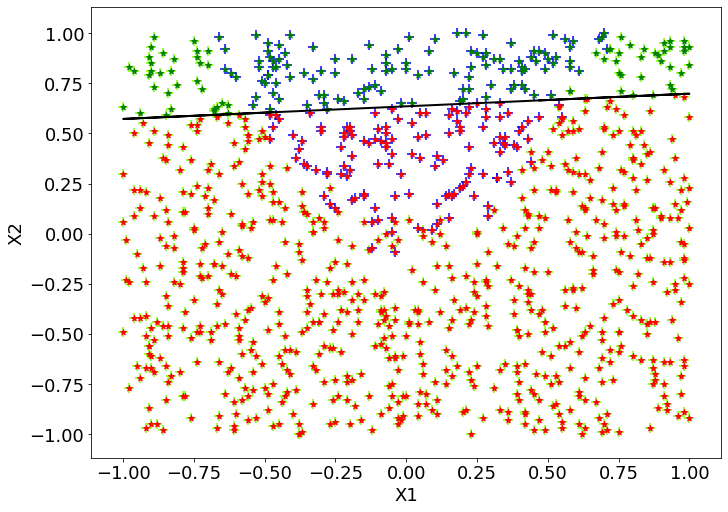

In [22]:
#for C value = 0.01. predicte the value of output.
#y_pred2 = np.sign(0.05226795*df.X1 + (-0.8311401 * df.X2) + 0.52791837)
y_pred2=model2.predict(X_train)
df['y_predicted2']=y_pred2
#calculating decsion boundary for c value 1(y=0 in y=mx1+mx2+c  where m1 and m2 are solpe and c in intercept.)
decision_boundary2=((-m3*df.X1)-c2)/m4
df4=df[df.y_predicted2 == 1]
df5=df[df.y_predicted2 == -1]
#plot the predicted graph with decision boundary.
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(df0['X1'],df0['X2'],color='lawngreen',marker='+',s=100)
plt.scatter(df1['X1'],df1['X2'],color='blue',marker='+',s=100)
plt.scatter(df4['X1'],df4['X2'],color='r',marker='*')
plt.scatter(df5['X1'],df5['X2'],color='g',marker='*')
plt.plot(df.X1,decision_boundary2,color ='black',linewidth=2)
plt.show()

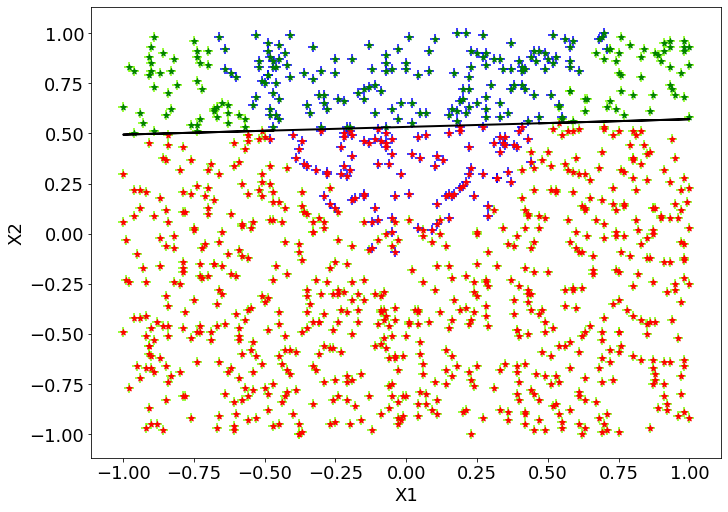

In [23]:
#for C value = 100. predicte the value of output.
#y_pred3 = np.sign(0.08728397*df.X1 + (-1.36805903 * df.X2) + 0.7098571)
y_pred3=model3.predict(X_train)
df['y_predicted3']=y_pred3
#calculating decision boundary for c value 1(y=0 in y=mx1+mx2+c  where m1 and m2 are solpe and c in intercept.)
decision_boundary3=((-m5*df.X1)-c3)/m6
df6=df[df.y_predicted3 == 1]
df7=df[df.y_predicted3 == -1]
#plt the graph along with decisoin boundary. 
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(df0['X1'],df0['X2'],color='lawngreen',marker='+',s=100)
plt.scatter(df1['X1'],df1['X2'],color='blue',marker='+',s=100)
plt.scatter(df6['X1'],df6['X2'],color='r',marker='*')
plt.scatter(df7['X1'],df7['X2'],color='g',marker='*')
plt.plot(df.X1,decision_boundary3,color ='black',linewidth=2)
plt.show()

In [24]:
#export the findings into a csv file
pd.DataFrame(df).to_csv('Week2_SVM_results.csv',index=False)

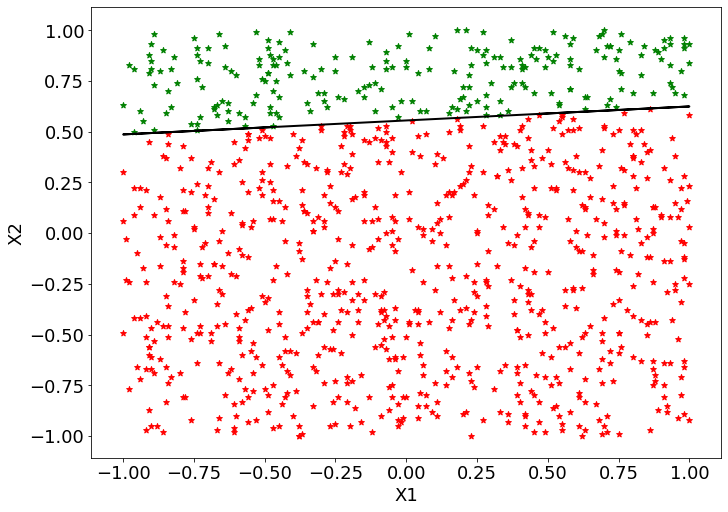

In [25]:
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(df2['X1'],df2['X2'],color='r',marker='*')
plt.scatter(df3['X1'],df3['X2'],color='g',marker='*')
plt.plot(df.X1,decision_boundary1,color ='black',linewidth=2)
plt.show()